# Il mio progetto riflette sulla dipendenza dal telefono negli adolescenti per approfondire i legami tra tecnologia, salute mentale e comportamenti sociali negli adolescenti.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("filtered_data_phone.csv")
df = df[["Age", "Gender", "Daily_Usage_Hours", "Sleep_Hours", "Social_Interactions", "Depression_Level"]]
df.head(20)

,Age,Gender,Daily_Usage_Hours,Sleep_Hours,Social_Interactions,Depression_Level
0,17,Male,3.5,6.9,4,5
1,17,Female,6.7,7.5,3,5
2,13,Female,3.6,7.3,5,8
3,16,Female,3.9,6.4,4,10
4,17,Female,3.7,9.6,2,6
5,16,Male,6.3,5.7,8,1
6,13,Female,2.8,5.6,4,10
7,14,Male,6.4,5.1,8,4
8,16,Female,6.4,5.9,9,6
9,17,Female,5.5,9.2,10,10


## Daily Phone Usage Hours by Age Group

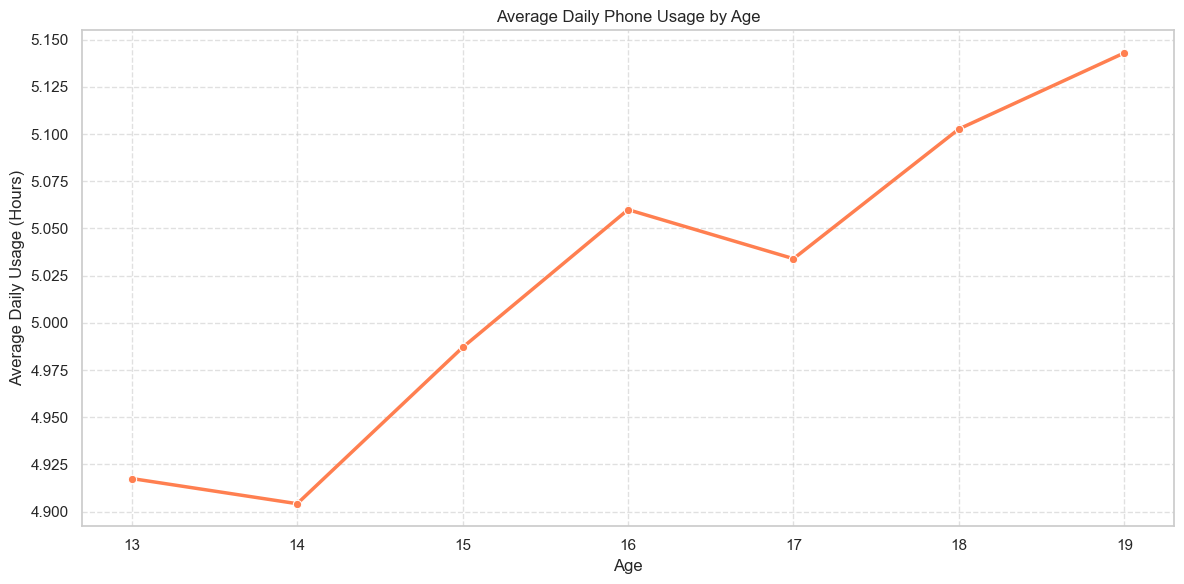

In [3]:
dff = pd.read_csv("data_phone.csv")
mean_usage = dff.groupby("Age")["Daily_Usage_Hours"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_usage, x="Age", y="Daily_Usage_Hours", marker="o", linewidth=2.5, color="coral")
plt.title("Average Daily Phone Usage by Age")
plt.xlabel("Age")
plt.ylabel("Average Daily Usage (Hours)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.locator_params(axis='y', nbins=12)
plt.tight_layout()
plt.show()


## Average Daily Phone Usage and Sleep Hours by Gender

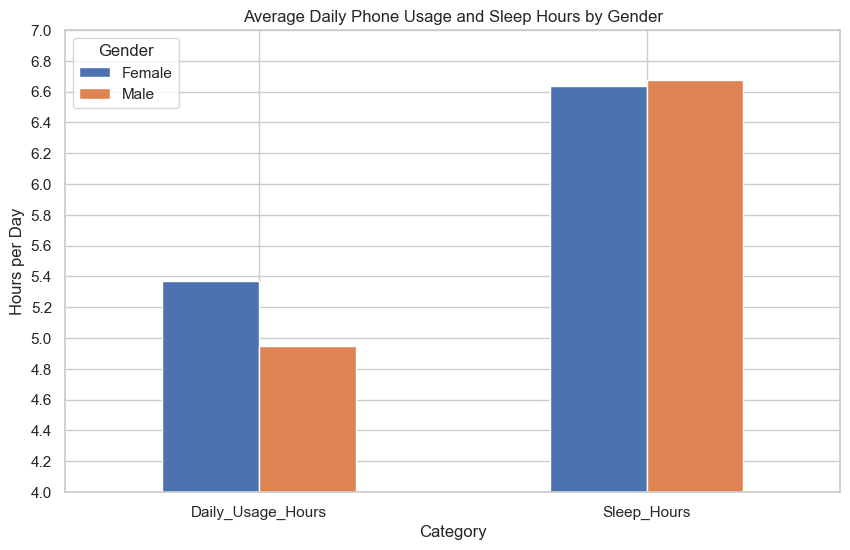

In [4]:
# Calcolo della media per ciascun genere
media = df.groupby("Gender")[["Daily_Usage_Hours", "Sleep_Hours"]].mean()
# Trasposizione e grafico a barre
media.T.plot(kind="bar", figsize=(10, 6))

# Titoli e etichette
plt.title("Average Daily Phone Usage and Sleep Hours by Gender")
plt.ylabel("Hours per Day")
plt.xlabel("Category")
plt.xticks(rotation=0)

# Imposta il limite dell'asse Y da 4 a 7
plt.ylim(4, 7)
plt.yticks(np.arange(4, 7.1, 0.2))
plt.show()


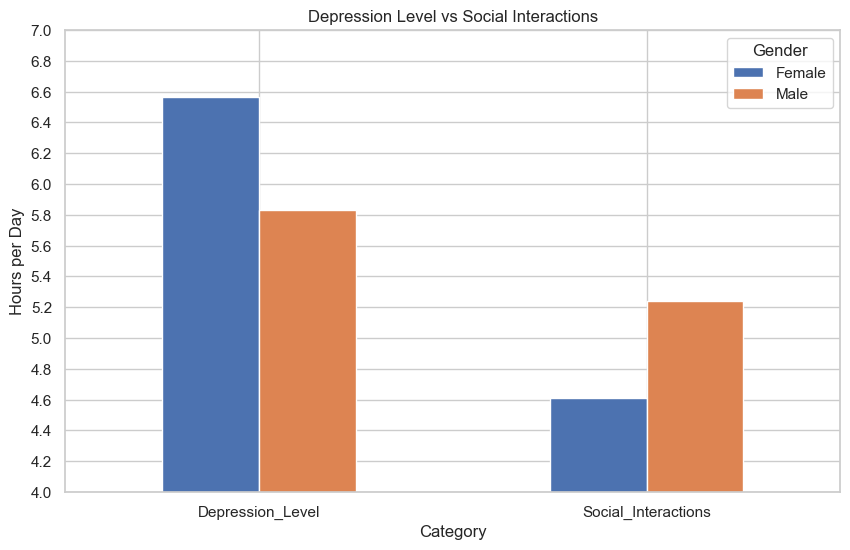

In [5]:
media = df.groupby("Gender")[["Depression_Level", "Social_Interactions"]].mean()
media.T.plot(kind="bar", figsize=(10, 6))

# Titoli e etichette
plt.title("Depression Level vs Social Interactions")
plt.ylabel("Hours per Day")
plt.xlabel("Category")
plt.xticks(rotation=0)

# Imposta il limite dell'asse Y da 4 a 7
plt.ylim(4, 7)
plt.yticks(np.arange(4, 7.1, 0.2))
plt.show()


## Clustering Users by Daily Usage vs. Sleep Hours

In [6]:
# Normalize data
X = df[["Daily_Usage_Hours", "Sleep_Hours"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

# Map cluster number to description
cluster_labels = {
    0: "High phone usage, Low sleep",
    1: "Moderate phone usage, Moderate sleep",
    2: "Low phone usage, High sleep"
}

# Create a new column with description
df['cluster'] = df['cluster'].map(cluster_labels)

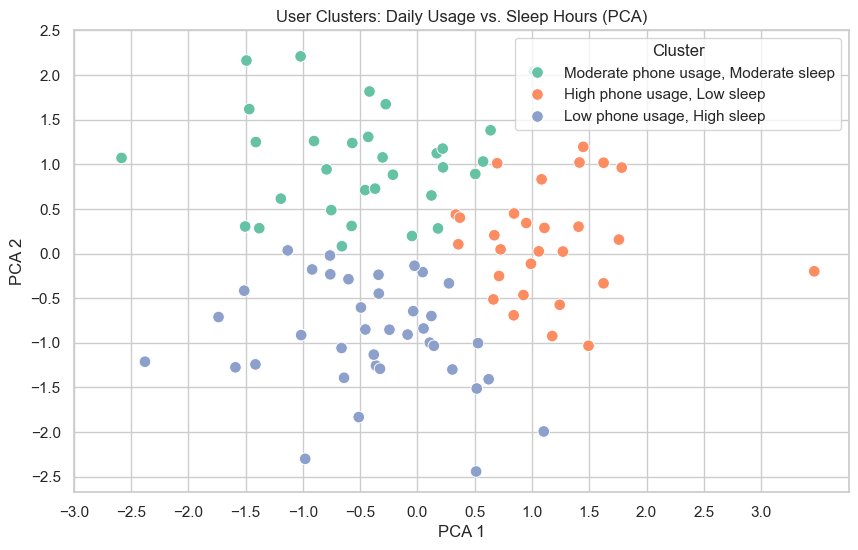

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2', s=70)
plt.title("User Clusters: Daily Usage vs. Sleep Hours (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.xticks(np.round(np.arange(-3, 3 + 0.5, 0.5), 2))
plt.yticks(np.round(np.arange(-2.5, 2.5 + 0.5, 0.5), 2))
plt.show()